# Heart Attack Prediction

## 1. Adjusting the data

### 1.1 Loading the Data

loading heart attack prediction dataset from from [kaggle](https://www.kaggle.com/imnikhilanand/heart-attack-prediction/data) and exploring it.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics




In [25]:
df = pd.read_csv('heart.csv')
print('first 5 rows:')
df.head()

first 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [26]:
##The information represented in the columns:
#Sex: 1 = male; 0 = female. 
#Cp: chest pain type; Value 1- typical angina; Value 2- atypical angina; Value 3- non-anginal pain; Value 4- asymptomatic.
#Trestbps: resting blood pressure; normal-120; high-above 140; low-under 90.
#Chol: serum cholestoral in mg/dl; noraml-if age is not more than 19-at most 170 mg/dL, else-125–200 mg/dL.
#Fbs: fasting blood sugar > 120 mg/dl: 1 = true; 0 = false.
#Restecg: resting electrocardiographic results; Value 0-normal; Value 1-abnormality; Value 2- probable or left ventricular hypertrophy.
#Thalach: maximum heart rate achieved.
#Exang: exercise induced angina; 1 = yes; 0 = no.
#Oldpeak: ST depression induced by exercise relative to rest.
#Slope:  slope: the slope of the peak exercise ST segment; Value 1- upsloping; Value 2- flat; Value 3- downsloping.
#Ca: number of major vessels (0-3) colored by flourosopy.
#Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect.
# Num: Heart disease status: the predict column; 0- no disease; 1- disease.


In [27]:
print('show numeric values stats:')
df.describe()

show numeric values stats:


,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


## 2. Cleansing

* fill missing values
* split X, y 
* scale X between 0-1

In [28]:
# convert all '?' values to nan
df = df.apply(pd.to_numeric, errors='coerce', axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28.0,1.0,2.0,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0.0
1,29.0,1.0,2.0,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0.0
2,29.0,1.0,2.0,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0.0
3,30.0,0.0,1.0,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0.0
4,31.0,0.0,2.0,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0.0


In [29]:
# fill missing values with the average of the value - without prior knowledge we assume average person
df = df.fillna(df.mean())
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28.0,1.0,2.0,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,1.894231,0.0,5.642857,0.0
1,29.0,1.0,2.0,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.894231,0.0,5.642857,0.0
2,29.0,1.0,2.0,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,1.894231,0.0,5.642857,0.0
3,30.0,0.0,1.0,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.894231,0.0,6.000000,0.0
4,31.0,0.0,2.0,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.894231,0.0,5.642857,0.0


In [30]:
# split the dataset into X and y
X = df[df.columns[:-1]]
y = df[df.columns[-1]].values

In [31]:
# scale X for each column

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X.values)

Chol vs Trestbps


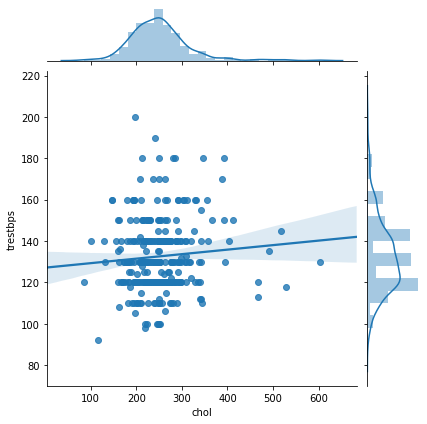

In [32]:
#There seems to be no direct relationship between blood pressure and cholesterol.
sns.jointplot("chol","trestbps" ,data=df, kind='reg')
print('Chol vs Trestbps')


Text(0.5, 1.0, 'Cp vs Thalach')

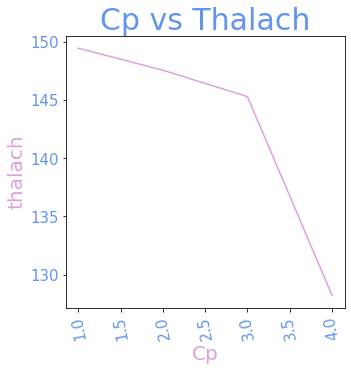

In [33]:
df_mean_ecg=df.groupby('cp').mean()
df_mean_ecg
plt.figure(figsize=(5,5))
plt.plot(df_mean_ecg.index, df_mean_ecg['thalach'],color="plum")
plt.xlabel('Cp', fontsize=20, color='plum')
plt.ylabel('thalach', fontsize=20, color='plum')
plt.xticks(fontsize=15,color="cornflowerblue",rotation=100)
plt.yticks(fontsize=15, color='cornflowerblue')
plt.title("Cp vs Thalach",fontsize=30, color="cornflowerblue")

## 3. Train Test Split

In [34]:
# create training and testing var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}')

(205, 13) (205,) (89, 13) (89,)


## 4. Model Evaluation

In [35]:
# train logistic regression model
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)
print('done train')

done train


In [36]:
# predict on test set
y_pred = clf.predict(X_test)

In [37]:

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


confusion matrix:
[[54  7]
 [ 8 20]]
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        61
         1.0       0.74      0.71      0.73        28

    accuracy                           0.83        89
   macro avg       0.81      0.80      0.80        89
weighted avg       0.83      0.83      0.83        89



Text(0.5, 1, 'Confusion matrix')

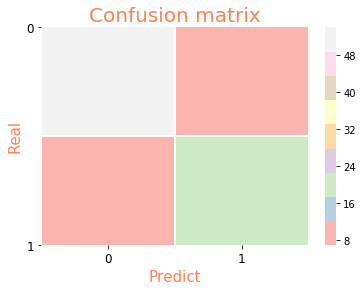

In [38]:

df_matrix=pd.DataFrame(data=confusion_matrix(y_test, y_pred),index=['0','1'],columns=['0','1'])
sns.heatmap(df_matrix,cmap='Pastel1', linecolor='white',linewidths=1)
plt.xlabel("Predict",fontsize=15,color="coral")
plt.ylabel("Real",fontsize=15,color="coral")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Confusion matrix",fontsize=20,color="coral")

In [39]:
parameters=dict(zip(df.columns[:-1].values,clf.coef_[0]))
parameters

{'age': -0.022540548050535025,
 'sex': 1.2369369312500695,
 'cp': 1.8664950330320225,
 'trestbps': -0.03863261971933042,
 'chol': 0.3506909838977419,
 'fbs': 0.8131779871645439,
 'restecg': -0.10859186276657684,
 'thalach': -0.4676459686871247,
 'exang': 1.6499193887078383,
 'oldpeak': 2.3355092875554164,
 'slope': 1.2015537544332768,
 'ca': 0.0,
 'thal': 0.44495920892831786}

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

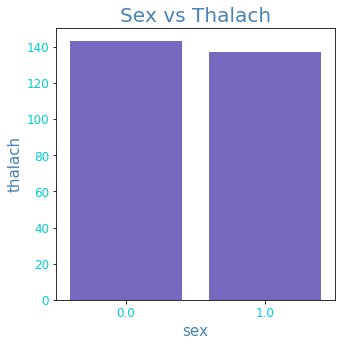

In [40]:
df_mean=df.groupby('sex').mean()
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(df_mean.index,y='thalach', data=df_mean,color="slateblue")
plt.title("Sex vs Thalach",fontsize=20,color= "steelblue")
plt.xlabel("sex",fontsize=15,color= "steelblue")
plt.ylabel("thalach",fontsize=15,color= "steelblue")
plt.xticks(fontsize=12,color="darkturquoise")
plt.yticks(fontsize=12,color="darkturquoise")

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 <a list of 8 Text yticklabel objects>)

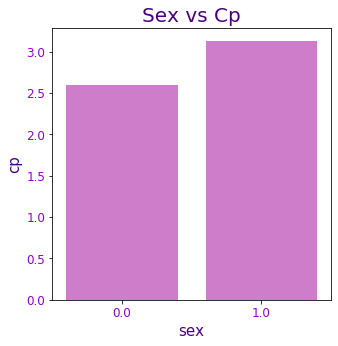

In [41]:
df_mean=df.groupby('sex').mean()
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(df_mean.index,y='cp', data=df_mean,color="orchid")
plt.title("Sex vs Cp",fontsize=20,color= "indigo")
plt.xlabel("sex",fontsize=15,color= "indigo")
plt.ylabel("cp",fontsize=15,color= "indigo")
plt.xticks(fontsize=12,color="darkviolet")
plt.yticks(fontsize=12,color="darkviolet")

In [62]:
#Separation for testing and training for the use of another algorithm-Random Forest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}')

(205, 13) (205,) (89, 13) (89,)


In [63]:
#Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')

In [64]:
# Fit on training data
model.fit(X_train, y_train)
print('done train')

done train


In [65]:
# Actual class predictions
y_pred2 = model.predict(X_test)

In [66]:

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred2))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred2))
print('\n')


=== Confusion Matrix ===
[[54  7]
 [ 8 20]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        61
         1.0       0.74      0.71      0.73        28

    accuracy                           0.83        89
   macro avg       0.81      0.80      0.80        89
weighted avg       0.83      0.83      0.83        89



